In [43]:
import requests
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

In [26]:
def execute_in_threads(function, items: list):
    """
    Выполняет функцию в потоках для списка элементов.

    Args:
        function (callable): Функция для выполнения.
        items (iterable): Список элементов для обработки.

    Returns:
        list: Результаты выполнения функции.
    """
    current_time = time.time()
    with ThreadPoolExecutor() as executor:
        results = executor.map(function, items)
    
    res_time = time.time() - current_time
    return list(results), res_time

In [12]:
def predictions(input: str):
    response = requests.post(
        "http://localhost/api/predict",
        json={"input": input},
        timeout=200
    )
    return response.json()

In [35]:
inputs8 = ["кола зеро 2л", "хер 3 штуки", "хентай", "пиво сок говна кусок", "балтика девятка 9 литров", "сок сады говна 1 тонна", "пенис 33см", "     ", "доктор пеппер 1 банка",]

In [36]:
inputs5 = ["кола зеро 2л", "хер 3 штуки", "хентай", "пиво сок говна кусок", "балтика девятка 9 литров"]

In [37]:
inputs1 = ["кола зеро 2л"]

In [38]:
inputs2 = ["кола зеро 2л", "хер 3 штуки",]

In [40]:
res, work_time = execute_in_threads(predictions, inputs5)

In [41]:
work_time

5.011169672012329

In [56]:
times = []
for i in range (1, 100):
    inputs = ["кола зеро 2л"]*i
    res, work_time = execute_in_threads(predictions, inputs)
    times.append(work_time)

In [58]:
times

[0.22554516792297363,
 0.3164854049682617,
 0.5882141590118408,
 0.7287602424621582,
 0.7141306400299072,
 0.9968411922454834,
 1.1292626857757568,
 1.2179739475250244,
 1.3291304111480713,
 1.6693322658538818,
 1.9051017761230469,
 1.9389965534210205,
 2.110638380050659,
 2.2034387588500977,
 2.527733564376831,
 2.5176169872283936,
 2.656797409057617,
 2.868983030319214,
 3.1055452823638916,
 3.1555891036987305,
 3.5119411945343018,
 3.7218174934387207,
 3.9925665855407715,
 4.307961702346802,
 4.142336368560791,
 4.076110601425171,
 4.170069932937622,
 4.61066460609436,
 4.7653937339782715,
 4.590304613113403,
 4.8082029819488525,
 4.954721450805664,
 5.073611736297607,
 5.524317741394043,
 5.681150436401367,
 5.162613153457642,
 5.456077814102173,
 6.157395124435425,
 6.660148620605469,
 6.678210735321045,
 6.707385301589966,
 5.896398544311523,
 6.401150226593018,
 6.595054864883423,
 6.667954683303833,
 6.104800701141357,
 6.896107912063599,
 7.292900562286377,
 7.647268533706665,

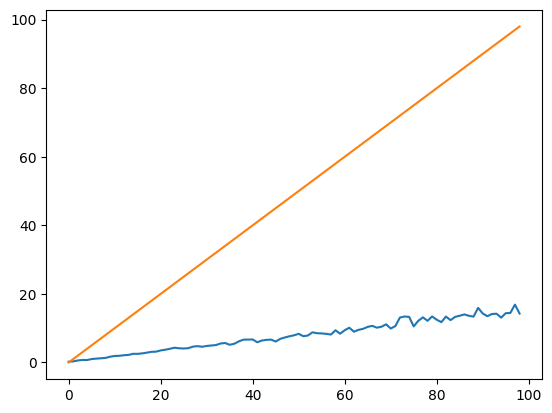

In [57]:
plt.plot(range(0, len(times)), times)
plt.plot(range(0, len(times)), range(0, len(times)))